In [1]:
import numpy as np #importing numpy as np
import pandas #importing pandas
import tensorflow as tf #importing tensorflow library
from tensorflow.keras import Sequential #importing sequential from keras in tensorflow
from tensorflow.keras.layers import Dense#importing dense from keras in tensorflow
from tensorflow.keras import metrics  #importing metrics from keras in tensorflow
from sklearn.preprocessing import StandardScaler #importing standardscaler from preprocessing in sklearn
from sklearn.model_selection import train_test_split#importing train_text_split from model selection in sklearn
#importing confusion matrix, accuracy score from metrics in sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import np_utils #importing np_utils from utils in keras 
import matplotlib.pyplot as plt #importing matplotlib for the plots


In [2]:
#loading dataset
data= pandas.read_csv("https://drive.google.com/uc?id=1PzJA23lUSlf2x1DeF_ek1YSAj-RFHWCp")

In [3]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,Target
count,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,...,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000
mean,0.325149,0.250856,0.484763,0.157566,0.064476,-0.034676,0.027441,0.158756,0.044486,-0.144606,...,-0.047705,-0.113735,0.047191,0.102357,0.009344,-0.067307,-0.071956,0.051448,0.111858,1.884545
std,0.204522,0.243939,0.149252,0.150190,0.101864,0.171234,0.100768,0.186429,0.131958,0.196909,...,0.165983,0.208250,0.130303,0.150444,0.092064,0.082618,0.094601,0.080394,0.126817,0.989164
min,-0.500320,-0.436028,-0.472676,-0.447495,-0.313397,-0.538982,-0.576506,-0.513460,-0.518323,-0.901989,...,-0.565970,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.375461,0.000000
25%,0.174858,0.096745,0.418656,0.106469,-0.001002,-0.140004,-0.018584,0.125626,-0.014899,-0.288113,...,-0.155606,-0.275271,-0.025788,-0.011130,-0.052096,-0.119219,-0.140703,-0.002805,0.022143,2.000000
50%,0.304040,0.210390,0.520782,0.180817,0.046851,-0.089144,0.034649,0.227751,0.045297,-0.214559,...,-0.072582,-0.201127,0.051501,0.161939,0.014949,-0.077523,-0.082641,0.049956,0.160371,2.000000
75%,0.451091,0.337773,0.575542,0.238215,0.107995,0.003196,0.086519,0.279041,0.112402,-0.033826,...,0.042184,0.076152,0.126679,0.216912,0.076296,-0.022659,-0.023184,0.105675,0.207754,2.000000
max,1.000000,1.000000,1.000000,0.752246,0.846513,0.696887,0.551762,0.642738,0.522768,0.523033,...,0.566873,0.668924,0.548584,0.681157,0.614064,0.388499,0.306126,0.389797,0.432207,4.000000


In [4]:
data.head() #showing of the dataset

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,Target
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0


**There is no need to standardize the data since we dont have a big range differences among the variables of the dataset and the dataset is in order**

In [5]:
#assigning features to X and Target to Y
X = data.drop(columns=['Target']).values
Y = data['Target'].values

In [6]:
#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [7]:
classes = np.unique(Y_train) #classes in the training data
nClasses = len(classes) #number of classes in the training data
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [8]:
X_train.shape #Checking shape of training data

(4379, 21)

In [9]:
Y_test.shape #checking shape of testing data

(1095,)

In [10]:
#Perfoming one-hot encoding
Y_train = np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

In [11]:
#shape of X_train
X_train[0].shape 

(21,)

In [12]:
 #viewing the dataset
X_train[0]

array([ 0.15784651,  0.23215661,  0.6371971 ,  0.24302247,  0.01670838,
       -0.12828764,  0.02307186,  0.1948651 , -0.04992036, -0.20888502,
        0.15355761,  0.23940722, -0.25477768, -0.17077825,  0.283424  ,
        0.22899124, -0.074587  , -0.17482187, -0.05605955,  0.20986454,
        0.24060409])

In [13]:
#checking X_text shape
X_test.shape

(1095, 21)

In [14]:
#model definition 
def baseline():
 
    model = Sequential() #creating a model
    # adding fully connected layers
    model.add(Dense(16, input_dim=21, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # Compiling model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

In [15]:
#initializing the model
model = baseline() 

In [16]:
#model summary
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Fitting the model on the training features and targets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=15, batch_size=15, verbose=1)

Epoch 1/15
205/205 [==============================] - 1s 4ms/step - loss: 0.8912 - accuracy: 0.6509 - val_loss: 0.6103 - val_accuracy: 0.7915
Epoch 2/15
205/205 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8600 - val_loss: 0.3584 - val_accuracy: 0.8744
Epoch 3/15
205/205 [==============================] - 1s 2ms/step - loss: 0.2427 - accuracy: 0.9282 - val_loss: 0.2377 - val_accuracy: 0.9361
Epoch 4/15
205/205 [==============================] - 1s 4ms/step - loss: 0.1712 - accuracy: 0.9573 - val_loss: 0.1931 - val_accuracy: 0.9414
Epoch 5/15
205/205 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9599 - val_loss: 0.1770 - val_accuracy: 0.9429
Epoch 6/15
205/205 [==============================] - 1s 3ms/step - loss: 0.1205 - accuracy: 0.9670 - val_loss: 0.1565 - val_accuracy: 0.9528
Epoch 7/15
205/205 [==============================] - 1s 3ms/step - loss: 0.1063 - accuracy: 0.9713 - val_loss: 0.1465 - val_accuracy: 0.9574
Epoch 

In [18]:
#Predicting on X_test data
prediction = model.predict(X_test) 

35/35 [==============================] - 0s 1ms/step


In [19]:
prediction_classes = np.argmax(prediction, axis=1)

In [20]:
#accuracy score of the model
accuracy_score(np.argmax(Y_test,1), prediction_classes) 

0.9762557077625571

In [21]:
#Plot the error over the epochs
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarising history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return


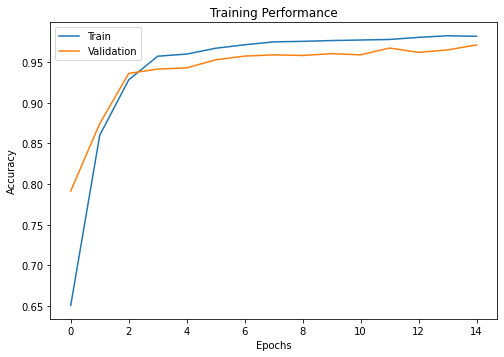

In [22]:
plot_hist(history.history, xsize=8, ysize=12)